# Unidad 1. Análisis Exploratorio

### Problemática:

**¿Qué factores personales y comportamentales se relacionan con los ingresos individuales en la región Pampeana?**
Este análisis busca explorar variables como el sexo, la edad y el nivel educativo, así como ciertas prácticas financieras del hogar (pedir préstamos, comprar en cuotas o al fiado), se asocian con el nivel de ingreso declarado por las personas.
Se trabaja sobre la region Pampeana, ya que es una region de intereses, dado que algunos participantes del grupo viven en la region y sirve para poder conocer ciertas caracteristicas de su zona.

### Variables:
Las variables a trabajar son:

| Nombre Tabla  | Descripción                |
|---------------|----------------------------|
| P47T          | Ingreso total ind. (mes)   |
| NIVEL_ED      | Nivel educativo alcanzado  |
| CH04          | Sexo                       |
| CH05          | Fecha de nacimiento        |
| CH06          | Edad en años cumplidos     |
| V14           | Piden préstamos a personas |
| V15           | Piden préstamos a bancos   |
| V16           | Compran en cuotas o fiado  |
| ESTADO        | Condición de actividad     |

### Población total y muestra:
Este trabajo se basa en los datos provistos por la Encuesta Permanente de Hogares (EPH) correspondientes al tercer trimestre de 2024. Para este análisis se utilizaron tanto la base de datos de personas (individual) como la base de hogares, que fueron solapadas mediante el identificador común presente en ambas tablas (número de hogar y componente).
La población total a la que pertenecen estos datos es la población residente en la República Argentina, de acuerdo a la cobertura de la EPH. Esta población incluye tanto a personas económicamente activas como inactivas, y contempla diversos niveles educativos, edades y situaciones familiares.

Para el análisis se realizó un recorte geográfico, tomando únicamente los hogares y personas correspondientes a la región Pampeana, que abarca aglomerados urbanos en las provincias de Buenos Aires, Córdoba, Santa Fe, Entre Ríos y La Pampa. Elegimos esta región porque representa una parte muy importante de la población del país y tiene mucha variedad en cuanto a situaciones sociales y económicas. Esto nos permite analizar distintos casos dentro de una misma zona.

La muestra analizada se compone de personas con ingresos individuales declarados, que además cuentan con información sobre sexo, edad, nivel educativo, y variables asociadas al comportamiento económico del hogar, como la compra en cuotas, al fiado, o el acceso a préstamos. Este enfoque permitió estudiar relaciones entre los ingresos individuales y diversas características sociodemográficas y de consumo dentro de la región Pampeana.

### Clasificar las variables elegidas.
|Columna  | Variable                  | Tipo de variable       | Fuente (tabla)    |
|---------|---------------------------|------------------------|-------------------|
|P47T     | Ingreso individual        | Cuantitativa continua  | Base individual   |
|CH06     | Edad                      | Cuantitativa continua  | Base individual   |
|CH05     | Fecha de nacimiento       | Cuantitativa continua  | Base individual   |
|CH04     | Sexo                      | Cualitativa            | Base individual   |
|NIVEL_ED | Nivel educativo           | Cualitativa ordinal    | Base individual   |
|ESTADO   | Estado actividad          | Cualitativa            | Base individual   |
|V16      | Compra en cuotas o fiado  | Cualitativa            | Base de hogares   |
|V15      | Préstamo banco            | Cualitativa            | Base de hogares   |
|V14      | Préstamo personas         | Cualitativa            | Base de hogares   |

### Diagrama de Tablas vs Variables Seleccionadas
![Distribución de variables en Hogares y Personas](der.png)



### Carga de datos de las encuestas

In [115]:
import pandas as pd

hogares = pd.read_excel("usu_hogar_T324.xlsx")
personas = pd.read_excel("usu_individual_T324.xlsx")

### Renombramiento de columnas con nombres mas intuitivos.

In [116]:
# Renombrar columnas de personas
renombrar_personas = {
    "CH04": "sexo",
    "CH05": "fecha_nacimiento",
    "CH06": "edad",
    "P47T": "ingreso",
    "NIVEL_ED": "nivel_educativo",
    "ESTADO": "estado_actividad",
    "CODUSU": "id_vivienda",
    "NRO_HOGAR": "id_hogar",
    "REGION": "region"
}
personas.rename(columns=renombrar_personas, inplace=True)

# Renombrar columnas de hogares
renombrar_hogares = {
    "V14": "prestamo_personas",
    "V15": "prestamo_banco",
    "V16": "compra_cuotas",
    "CODUSU": "id_vivienda",
    "NRO_HOGAR": "id_hogar",
    "REGION": "region"
}
hogares.rename(columns=renombrar_hogares, inplace=True)

##### Configuración de dependencias

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

Como se va a trabajar sobre la región Pampeana (Número 43) se filtra todas las filas que cumplan esa valor.

In [118]:
personas_fil_pam = personas[personas['region'] == 43]

In [119]:
print("Longitud Tabla Personas:", len(personas))
print("Longitud Tabla Personas Filtrada:", len(personas_fil_pam))


Longitud Tabla Personas: 47564
Longitud Tabla Personas Filtrada: 14315


Se redujo el total de la tabla personas un 30%.
Ahora se va a filtrar las columnas (variables) a trabajar:

In [120]:
personas_fil = personas_fil_pam[['id_vivienda', 'id_hogar', 'sexo', 'edad', 'ingreso', 'nivel_educativo', 'estado_actividad', 'region']]
personas_fil.head()

,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
0,TQRMNOPTVHLOKRCDEFJAH00803557,1,2,33,-9.0,6,1,43
1,TQRMNOPTVHLOKRCDEFJAH00803557,1,1,33,-9.0,6,1,43
2,TQRMNOQPRHKLKNCDEFJAH00868631,1,1,81,1750000.0,6,1,43
3,TQRMNOQPRHKLKNCDEFJAH00868631,1,2,78,400000.0,6,3,43
4,TQRMNORVXHKLKNCDEFJAH00868632,1,1,65,1200000.0,4,1,43


In [121]:
personas_fil.isnull().sum()

id_vivienda          0
id_hogar             0
sexo                 0
edad                 0
ingreso             15
nivel_educativo      0
estado_actividad     0
region               0
dtype: int64

Encontramos que en la columna de **Ingreso** hay 15 filas nulas. Sobre la variable de ingresos. Analizando filtramos las filas con valores nulos.

In [122]:
personasnulos = personas_fil[personas_fil.isnull().any(axis=1)]
personasnulos

,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
731,TQRMNOPYWHKMKMCDEFMDB00868439,1,2,56,NaN,4,0,43
4159,TQRMNOQRWHLNLPCDEIKAH00807963,1,1,53,NaN,2,0,43
5439,TQRMNOPRTHJOLSCDEFKID00862865,1,1,16,NaN,3,0,43
17606,TQRMNORXRHMNKMCDEFIAH00870738,1,1,56,NaN,4,0,43
19213,TQRMNOPXUHLKKRCDEFMDB00804085,1,1,37,NaN,4,0,43
19214,TQRMNOPXUHLKKRCDEFMDB00804085,1,2,39,NaN,6,0,43
21233,TQRMNOQVVHLMKTCDEGKDB00805043,2,1,41,NaN,4,0,43
25056,TQRMNOSSUHJKKTCDEFKID00870296,1,1,41,NaN,4,0,43
25057,TQRMNOSSUHJKKTCDEFKID00870296,1,2,35,NaN,6,0,43
39376,TQRMNOQPVHKNLQCDEFMDB00871976,1,1,45,NaN,4,0,43


Podemos observar que corresponde a que la encuesta NO HA SIDO RESPONDIDA (Codigo de Estado "0"). Por lo que proponemos dado que casi todos los datos (14/15) son mayores de edad, promediar el valor de ingreso mensual para completar los campos nulos a fin de poder utilizar los datos sin que afecte las medias muestrales.

In [123]:
promedio_ingresos = personas_fil['ingreso'].mean()
personas_fil.loc[:, 'ingreso'] = personas_fil['ingreso'].fillna(promedio_ingresos)

Hacemos un resumen rápido estádistico.

In [124]:
personas_fil.describe()

,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
count,14315.000000,14315.000000,14315.000000,1.431500e+04,14315.000000,14315.000000,14315.0
mean,1.028222,1.519246,37.251764,2.953922e+05,3.748795,2.182676,43.0
std,0.175046,0.499647,22.394482,4.932133e+05,1.774382,1.129003,0.0
min,1.000000,1.000000,-1.000000,-9.000000e+00,1.000000,0.000000,43.0
25%,1.000000,1.000000,18.000000,0.000000e+00,2.000000,1.000000,43.0
50%,1.000000,2.000000,35.000000,0.000000e+00,4.000000,3.000000,43.0
75%,1.000000,2.000000,55.000000,4.300000e+05,5.000000,3.000000,43.0
max,4.000000,2.000000,102.000000,1.237000e+07,7.000000,4.000000,43.0


Hay un minimo de edad de -1 que no es lógico, y de ingresos -9. Y máximos en ingresos mensual marca como maximo $12.370.000 (puede ser correcto).
Viendo el comentario:

### Comentario General
![Observaciones Comentario](ComentarioGeneral.jpg)

Si bien no está explicado, el valor -1 de edad corresponde a edades menores a un año. Analizamos los valores de esas fechas:

In [126]:
personas_fil_pam = personas_fil_pam.copy()
personas_fil_pam.loc[:, 'fecha_nacimiento'] = pd.to_datetime(personas_fil_pam['fecha_nacimiento'], errors='coerce')
personas_fil_pam_ordenada = personas_fil_pam.sort_values(by='fecha_nacimiento')

In [127]:
filas_edad = personas_fil_pam_ordenada[personas_fil_pam_ordenada['edad'] == -1]
filas_edad = filas_edad[['fecha_nacimiento', 'edad', 'ingreso']]
filas_edad

,fecha_nacimiento,edad,ingreso
21036,1900-01-01 00:00:00,-1,0.0
8355,1900-01-01 00:00:00,-1,0.0
19653,1900-01-01 00:00:00,-1,0.0
8582,1900-01-01 00:00:00,-1,0.0
42914,1900-01-01 00:00:00,-1,0.0
...,...,...,...
26152,2024-08-05 00:00:00,-1,0.0
21912,2024-08-08 00:00:00,-1,0.0
19566,2024-08-29 00:00:00,-1,0.0
1174,2024-09-08 00:00:00,-1,0.0


Son 101 personas con edad = -1.

Todas tienen ingreso = 0, lo cual es razonable si hablamos de menores de edad (bebés).

Muchas tienen fecha de nacimiento = 1900-01-01, que es un valor erróneo, lo cual puede significar que el dato no fue bien ingresado o quedó vacío.

Algunas tienen fechas válidas pero recientes (2024), lo cual podría representar bebés reales.

También hay al menos un caso con NaT (fecha no informada).

## Conclusión

Estos datos no aporta al análisis porque:

- Son personas sin ingresos.

- Son bebes o errores de carga.

- No son representativos de la población económicamente activa.


**Por lo tanto los excluimos del análisis para evitar distorsiones**


In [128]:
filas_edad.value_counts()

fecha_nacimiento  edad  ingreso
1900-01-01        -1    0.0        21
2024-02-04        -1    0.0         3
2024-02-25        -1    0.0         2
2024-05-30        -1    0.0         2
2023-10-20        -1    0.0         2
                                   ..
2023-12-23        -1    0.0         1
2023-12-22        -1    0.0         1
2023-12-19        -1    0.0         1
2023-12-14        -1    0.0         1
2024-09-08        -1    0.0         1
Name: count, Length: 75, dtype: int64

In [ ]:
filas_1900 = filas_edad[filas_edad['CH05'] == '1900-01-01']
cantidad_filas_1900 = len(filas_1900)
print(f"Cantidad de filas con '1900-01-01': {cantidad_filas_1900}")

Cantidad de filas con '1900-01-01': 0


- 21 casos tiene fecha de nacimiento 199-01-01 que suponemos que son errores de carga

- El resto tienen fecha de nacimiento reciente, osea son bebes o niños menores a 1 año, que no serían relevantes para el análisis de ingresos.

In [ ]:
personas_sin_ingresos = personas_fil[personas_fil['ingreso'] == 0]
print('Cantidad de filas con ingresos igual a cero:', len(personas_sin_ingresos))

Cantidad de filas con ingresos igual a cero: 4761


In [ ]:
personas_sin_ingresos.sample(15)

,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region
21331,TQRMNOQUUHJMMNCDEFKID00864104,1,2,14,0.0,3,3,43
41451,TQRMNORWTHKNKQCDEGKDB00871723,1,1,10,0.0,1,3,43
1665,TQUMNOQPUHKOKNCDEGJBF00868614,1,1,5,0.0,7,4,43
5675,TQRMNOQSRHLOKMCDEFLID00803819,2,2,12,0.0,1,3,43
27311,TQRMNORYVHMOLNCDEFJAH00808723,1,1,9,0.0,1,4,43
26226,TQRMNOSWVHKOLUCDEFIAH00869833,1,2,5,0.0,7,4,43
40046,TQRMNOSUTHJKKMCDEFJAH00865205,1,2,27,0.0,6,2,43
36424,TQTMNORTPHLOKPCDEFMDB00803966,1,1,5,0.0,7,4,43
8966,TQRMNORVVHMOLSCDEFJAH00866947,1,1,17,0.0,3,3,43
7935,TQRMNOTUWHKMLQCDEFIAH00868000,1,2,43,0.0,6,3,43


Analizamos los datos -9 como no respondidos:

In [ ]:
filas_cod9 = personas_fil[personas_fil['ingreso'] == -9]
print('cantidad de filas con ingresos -9:', len(filas_cod9))

cantidad de filas con ingresos -9: 2411


**** COMPLETAMOS LOS -9 CON EL PROMEDIO COMO LOS DATOS NULOS? NOS QUEDA MAS DEL 50% DE LOS VALORES CON $0 (HAY QUE MODIFICAR EL PROMEDIO COMPLETADO EN LAS 15 FILAS)

## Análisis exploratorio de tabla Hogares

In [ ]:
hogares_fil_pam = hogares[hogares['region'] == 43]
print("Longitud Tabla Hogares:", len(hogares))
print("Longitud Tabla Hogares Filtrada:", len(hogares_fil_pam))

Longitud Tabla Hogares: 16650
Longitud Tabla Hogares Filtrada: 5410


Se redujo el total de la tabla personas un 32%. Se tabaja sobre las variables de interés. Como las planillas se conectan con la columna "CODUSU" que es el Código para distinguir viviendas, permite aparearlas con Hogares y Personas.

In [ ]:
hogares_fil = hogares_fil_pam[['id_vivienda', 'id_hogar', 'region', 'prestamo_personas', 'prestamo_banco', 'compra_cuotas']]


In [ ]:
hogares_fil.head()

,id_vivienda,id_hogar,region,prestamo_personas,prestamo_banco,compra_cuotas
0,TQRMNOQVSHMMLOCDEFJAH00808791,1,43,2,2,1
1,TQRMNOPTQHKLLSCDEFJAH00866946,1,43,2,2,1
2,TQRMNORVTHMOLSCDEFJAH00808761,1,43,2,2,2
3,TQRMNORVVHMOLSCDEFJAH00866947,1,43,2,2,2
4,TQRMNOTPTHLNLRCDEFJAH00803474,1,43,2,2,2


In [ ]:
hogares_fil.isnull().sum()


id_vivienda          0
id_hogar             0
region               0
prestamo_personas    0
prestamo_banco       0
compra_cuotas        0
dtype: int64

No hay filas nulas.

Hacemos un resumen rápido estádistico.

In [ ]:
hogares_fil.describe()

,id_hogar,region,prestamo_personas,prestamo_banco,compra_cuotas
count,5410.000000,5410.0,5410.000000,5410.000000,5410.000000
mean,1.034566,43.0,1.851386,1.891682,1.529575
std,0.192548,0.0,0.370006,0.327041,0.509435
min,1.000000,43.0,1.000000,1.000000,1.000000
25%,1.000000,43.0,2.000000,2.000000,1.000000
50%,1.000000,43.0,2.000000,2.000000,2.000000
75%,1.000000,43.0,2.000000,2.000000,2.000000
max,4.000000,43.0,9.000000,9.000000,9.000000


Hay errores de ingreso de datos al tener maximos en "9" cuando permite 1 o 2, en cuanto a comportamientos de consumo-prestamos.

In [ ]:
hogares_fil['prestamo_banco'].value_counts()

prestamo_banco
2    4816
1     593
9       1
Name: count, dtype: int64

In [ ]:
hogares_fil['prestamo_personas'].value_counts()

prestamo_personas
2    4598
1     811
9       1
Name: count, dtype: int64

In [ ]:
hogares_fil['compra_cuotas'].value_counts()

compra_cuotas
2    2857
1    2552
9       1
Name: count, dtype: int64

Vemos una Fila con el valor 9 en la columna de prestamos a personas, por lo que se revisara cada estas variables. Significa que no ha respondido.

Como es un único datos en cada columna, eliminamos las filas con valor 9 (son 3 en total)

In [ ]:
hogares_fil = hogares_fil[hogares_fil['prestamo_banco'] != 9]

In [ ]:
hogares_fil = hogares_fil[hogares_fil['prestamo_personas'] != 9]

In [ ]:
hogares_fil = hogares_fil[hogares_fil['compra_cuotas'] != 9]

In [ ]:
hogares_fil.describe()

,id_hogar,region,prestamo_personas,prestamo_banco,compra_cuotas
count,5409.000000,5409.0,5409.000000,5409.000000,5409.000000
mean,1.034572,43.0,1.850065,1.890368,1.528194
std,0.192565,0.0,0.357041,0.312460,0.499251
min,1.000000,43.0,1.000000,1.000000,1.000000
25%,1.000000,43.0,2.000000,2.000000,1.000000
50%,1.000000,43.0,2.000000,2.000000,2.000000
75%,1.000000,43.0,2.000000,2.000000,2.000000
max,4.000000,43.0,2.000000,2.000000,2.000000


### Personas y Hogares región Pampeana

Unimos ambas tablas a través de las variables id_vivienda y id_hogar

El tipo de unión es "inner", es decir, solo se conservan las filas que existen en ambas tablas con esos IDs coincidentes.

In [ ]:
df_final = pd.merge(personas_fil, hogares_fil, on=['id_vivienda', 'id_hogar', 'region'], how='inner')
len(df_final)


14313

In [ ]:
df_final.head(15)


,id_vivienda,id_hogar,sexo,edad,ingreso,nivel_educativo,estado_actividad,region,prestamo_personas,prestamo_banco,compra_cuotas
0,TQRMNOPTVHLOKRCDEFJAH00803557,1,2,33,-9.0,6,1,43,2,2,1
1,TQRMNOPTVHLOKRCDEFJAH00803557,1,1,33,-9.0,6,1,43,2,2,1
2,TQRMNOQPRHKLKNCDEFJAH00868631,1,1,81,1750000.0,6,1,43,2,2,2
3,TQRMNOQPRHKLKNCDEFJAH00868631,1,2,78,400000.0,6,3,43,2,2,2
4,TQRMNORVXHKLKNCDEFJAH00868632,1,1,65,1200000.0,4,1,43,2,1,1
5,TQRMNORVXHKLKNCDEFJAH00868632,1,2,66,435600.0,4,1,43,2,1,1
6,TQRMNORVXHKLKNCDEFJAH00868632,1,1,30,1125000.0,5,1,43,2,1,1
7,TQRMNQYTSHMOKQCDEFJAH00851671,1,1,63,-9.0,3,1,43,2,2,2
8,TQRMNQYTSHMOKQCDEFJAH00851671,1,2,60,0.0,3,3,43,2,2,2
9,TQRMNQYTSHMOKQCDEFJAH00851671,1,2,22,0.0,4,2,43,2,2,2


Los datos de préstamo están en la tabla de hogares porque representan prácticas declaradas por el hogar, no por cada persona.

Por eso, al unir las bases, todas las personas del hogar aparecen con ese mismo dato. Es importante tenerlo en cuenta para no suponer que cada integrante pidió un préstamo, sino que es una característica del entorno económico del hogar.


---
# Unidad 2 - Estadística descriptiva

## Gráficos - Región Pampeana

### ESTADO - Condición de Actividad
Tipo de variable: Nominal

Creamos un diccionario para traducir códigos de estado de actividad:

In [ ]:
estado = pd.DataFrame([
    (0, "Encuesta no realizada"),
    (1, "Ocupado"),
    (2, "Desocupado"),
    (3, "Inactivo"),
    (4, "Menor de 10 años")
], columns=["estado_actividad", "estado_nombre"])

##### Datos faltantes

Revisamos si hay valores faltantes en `estado_actividad`

In [ ]:
personas_fil["estado_actividad"].isna().sum()

0

### Análisis de Frecuencias

#### Frecuencia absoluta de cada categoría

In [ ]:
personas_fil.merge(estado, how="inner", on="estado_actividad")["estado_nombre"].value_counts()

estado_nombre
Ocupado                  6389
Inactivo                 5794
Menor de 10 años         1620
Desocupado                497
Encuesta no realizada      15
Name: count, dtype: int64

#### Muestra la frecuencia relativa de cada categoría

In [ ]:
personas_fil.merge(estado, how="inner", on="estado_actividad")["estado_nombre"].value_counts(normalize=True)

estado_nombre
Ocupado                  0.446315
Inactivo                 0.404750
Menor de 10 años         0.113168
Desocupado               0.034719
Encuesta no realizada    0.001048
Name: proportion, dtype: float64

#### Gráfico de torta

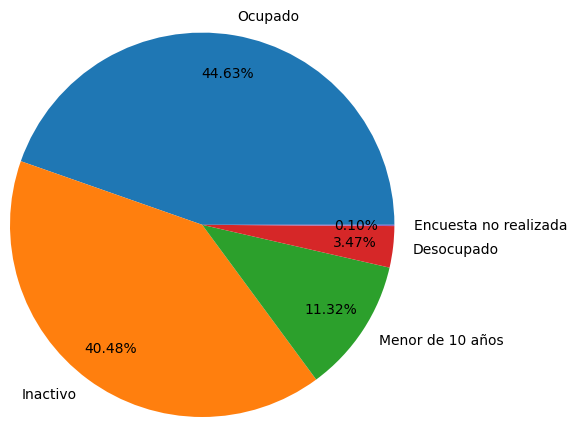

In [ ]:
frecuencias = personas_fil.merge(estado, how="inner", on="estado_actividad")["estado_nombre"].value_counts()
plt.pie(frecuencias, labels=frecuencias.index, autopct="%.2f%%", pctdistance=0.8, labeldistance=1.1, radius=1.3)
plt.show()

### Conclusiones de estado de actividad

- Solo el 44.63% de las personas están ocupadas, es decir, tienen trabajo. Esto significa que menos de la mitad de la muestra está en condiciones de generar ingresos regularmente.

- El 40.48% está inactivo, lo que incluye estudiantes, jubilados, etc. Estas personas en general no tienen ingresos laborales.

- El 11.32% son menores de 10 años, por lo tanto no trabajan ni tienen ingresos.

- Apenas un 3.47% está desocupado, es decir, busca trabajo pero no lo tiene.

Esto nos muestra que más de la mitad de la población no está trabajando. Por eso, cuando analicemos ingresos, vamos a encontrar muchas personas con ingreso cero o muy bajo. Es importante tener esto en cuenta para interpretar correctamente los resultados.



### NIVEL_ED - Nivel Educativo

Tipo de Variable: Ordinal

Creación del diccionario de niveles educativos


In [ ]:
nivel_educativo = pd.DataFrame([
    (1, "Primario incompleto (incluye educación especial)"),
    (2, "Primario completo"),
    (3, "Secundario incompleto"),
    (4, "Secundario completo"),
    (5, "Superior universitario incompleto"),
    (6, "Superior universitario completo"),
    (7, "Sin instrucción"),
    (9, "Ns/Nr"),
    ], columns=["nivel_educativo", "nivel_educativo_nombre"])



#### Datos faltantes

No hay registros con valores indefinidos.


In [ ]:
personas_fil["nivel_educativo"].isna().sum()

0

#### Análisis de Frecuencias

Frencuencias absolutas por nivel educativo

In [ ]:
personas_fil.merge(nivel_educativo, how="inner", on="nivel_educativo")[["nivel_educativo","nivel_educativo_nombre"]].value_counts()

nivel_educativo  nivel_educativo_nombre                          
4                Secundario completo                                 2965
3                Secundario incompleto                               2887
6                Superior universitario completo                     2156
1                Primario incompleto (incluye educación especial)    2016
5                Superior universitario incompleto                   1743
2                Primario completo                                   1672
7                Sin instrucción                                      876
Name: count, dtype: int64

Frecuencias relativas por nivel educativo.

In [ ]:
personas_fil.merge(nivel_educativo, how="inner", on="nivel_educativo")["nivel_educativo_nombre"].value_counts(normalize=True)

nivel_educativo_nombre
Secundario completo                                 0.207125
Secundario incompleto                               0.201677
Superior universitario completo                     0.150611
Primario incompleto (incluye educación especial)    0.140831
Superior universitario incompleto                   0.121760
Primario completo                                   0.116801
Sin instrucción                                     0.061195
Name: proportion, dtype: float64

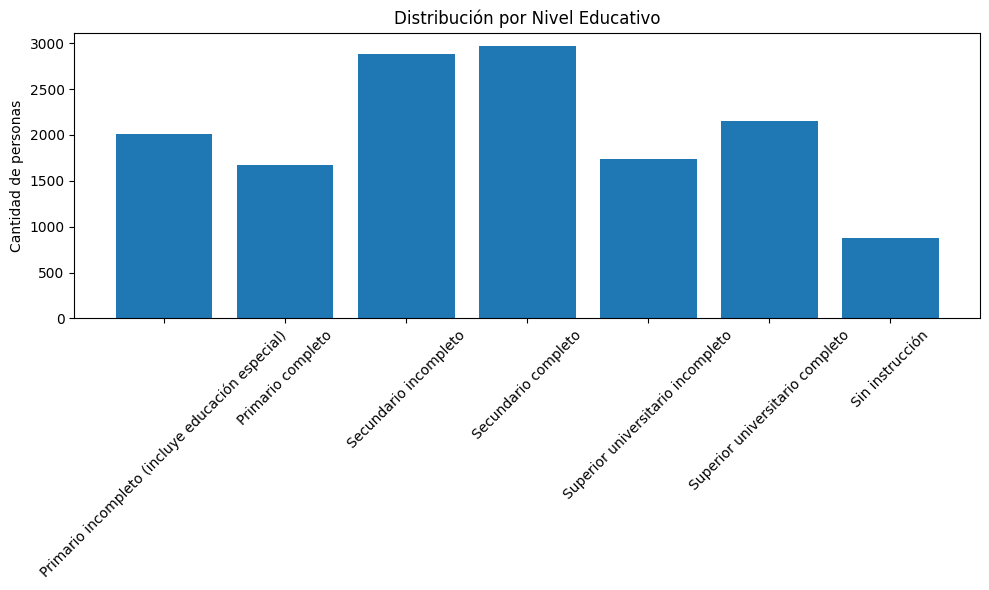

In [ ]:
frecuencias = personas_fil.merge(nivel_educativo, how="inner", on="nivel_educativo") \
    [["nivel_educativo", "nivel_educativo_nombre"]].value_counts() \
    .reset_index(name='nivel_educativo_count') \
    .sort_values("nivel_educativo")

plt.figure(figsize=(10, 6))
plt.bar(frecuencias["nivel_educativo_nombre"], frecuencias["nivel_educativo_count"])
plt.xticks(rotation=45)
plt.title("Distribución por Nivel Educativo")
plt.ylabel("Cantidad de personas")
plt.tight_layout()
plt.show()


### Conclusiones sobre el Nivel Educativo

- La mayoría de las personas en la muestra tienen nivel secundario completo o incompleto, lo que representa el grupo más numeroso.

- Le siguen los niveles superior universitario completo e incompleto, lo que indica una presencia importante de personas con educación terciaria o universitaria.

- Los niveles primario completo e incompleto también están presentes, pero en menor medida.

- Un pequeño porcentaje de la población declara no tener instrucción.

Esta distribución es importante porque el nivel educativo es una variable que puede influir en el ingreso de las personas. Más adelante vamos a analizar si a mayor educación también hay mayores ingresos.



#### Variable Edad
Tipo de variable: Continua

Medidas estadísticas básicas de la variable edad: mínimo, máximo, media, cuartiles, etc.  

Sirve para entender la distribución antes de graficar.

In [ ]:
personas_fil["edad"].describe()

count    14315.000000
mean        37.251764
std         22.394482
min         -1.000000
25%         18.000000
50%         35.000000
75%         55.000000
max        102.000000
Name: edad, dtype: float64

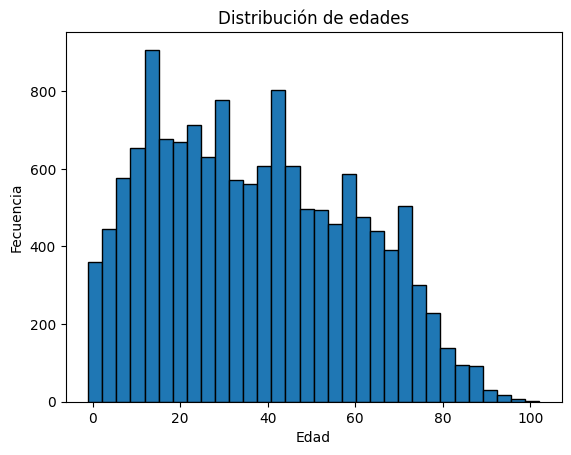

In [ ]:
bin_edges = np.histogram_bin_edges(personas_fil["edad"], bins='scott')
plt.hist(personas_fil["edad"], edgecolor='black', bins=bin_edges)
plt.xlabel('Edad')
plt.ylabel('Fecuencia')
plt.title("Distribución de edades")
plt.show()

### Conclusión sobre la distribución de edades

La distribución de edades en la muestra es amplia y abarca desde recién nacidos hasta adultos mayores. La mayoría de las personas se concentran entre los 10 y 40 años, con un pico de frecuencia cercano a los 15 años, lo que indica una fuerte presencia de adolescentes o jóvenes en la región Pampeana.

A medida que aumenta la edad, la frecuencia disminuye progresivamente. Esto es importante porque la edad puede influir tanto en la probabilidad de tener ingresos como en el monto percibido, por lo que será una variable a tener en cuenta en análisis posteriores.


#### Variable: Sexo
Varieble cualititativa

/tmp/ipykernel_31491/2496684717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sexo', data=personas_fil, palette='Set2')


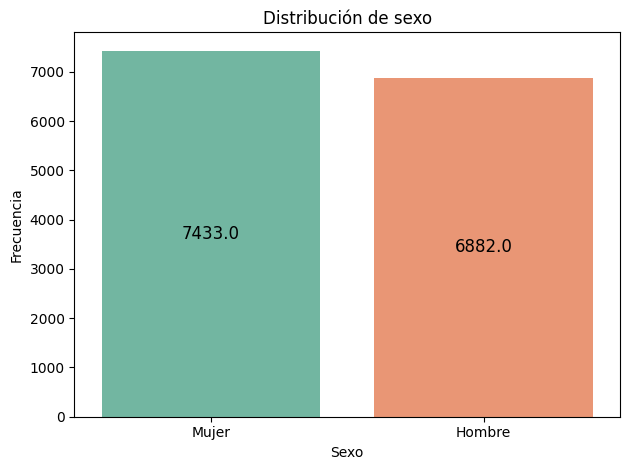

In [ ]:

personas_fil['sexo'] = personas_fil['sexo'].map({1: 'Hombre', 2: 'Mujer'})
ax = sns.countplot(x='sexo', data=personas_fil, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2, 
        height * 0.5,
        str(height),  
        ha='center', va='center', 
        color='black', fontsize=12
    )

plt.title('Distribución de sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Conclusión sobre la variable Sexo

El gráfico muestra que la población está compuesta por hombres y mujeres en proporciones bastante similares, con una ligera mayoría de mujeres.

Esto es importante porque hay una cantidad suficiente de personas de ambos sexos, lo que nos va a permitir más adelante comparar los ingresos entre hombres y mujeres de forma equilibrada.

## Ingreso 
Cuantitativa Continua

### Problemas comunes de la Variable Ingresos

a) Asimetría de la variable con presencia de valores extremos:

- Las variables de ingresos son en todos los países variables asimétricas hacia la derecha, caracterizadas por presentar muchos valores concentrados en la cola izquierda (valores bajos) de la distribución y pocos valores extremos
a la derecha. La mayoría de las personas gana ingresos bajos o medios, y hay pocos casos con ingresos muy altos que “empujan” el promedio hacia arriba.


Este tipo de distribución genera dos consecuencias importantes:

- El promedio se ve influenciado por esos valores altos.
- La **mediana** suele ser una medida más representativa para describir el ingreso típico de la población.


b) Dificultad de determinar el carácter de los valores extremos y su tratamiento:


Las variables de ingreso son utilizadas para construir diferente indicadores: medias o medianas de ingreso, medidas de desigualdad, e.g coeficiente de Gini, ratios, estimaciones de pobreza, etc.. Para cada uno de estos indicadores, hay varias formas de tratar los valores extremos:


- Asignarles **ponderación** menor para reducir su influencia, suponiendo que son valores totalmente atípicos,
que no 'representan' a otros individuos.

- **Modificar** el valor de la variable ('trimming'), asignándole el primer valor inferior
considerado no 'extremo'.

- **Eliminarlo** del análisis, etc." [1]

#### Tratamiento de la no Respuesta en la Encuesta Permanente Hogares

"El método de imputación de ingresos utilizado es el de hot-deck aleatorio que sintéticamente, consiste en seleccionar un ‘donante’ para cada valor faltante dentro de cierta sub-población definida por ciertas variables auxiliares, correlacionadas o asociadas con la variable cuya no respuesta se corrige. Ello significa que cada valor faltante es ‘imputado’ por un valor ‘válido’ que pertenece al mismo grupo de clasificación. La imputación se realiza sustituyendo el valor faltante por un valor válido en cada una de las
variables."

##### Referencias
1. https://www.santafe.gob.ar/index.php/web/content/download/80496/388462/file/eph_metodologia_15.pdf
2. https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/eph_innovaciones_12_09.pdf

#### Análisis de la Muestra


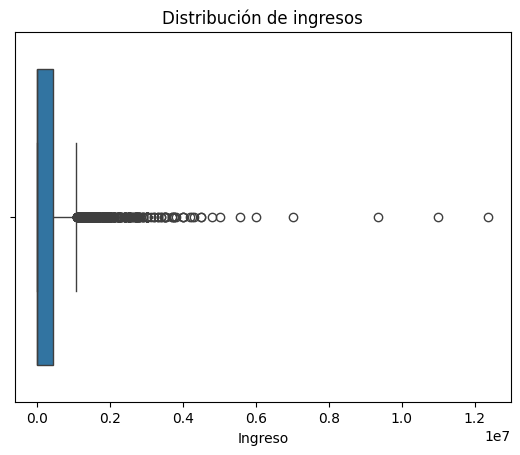

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=personas_fil['ingreso'])
plt.title('Distribución de ingresos')
plt.xlabel('Ingreso')
plt.show()


Para comenzar el análisis, se filtraron los valores no válidos de la variable ingreso: se eliminaron los `-9` (que indican "no respuesta") y los valores nulos. Esto redujo la muestra a 11.904 personas.

El gráfico tipo **boxplot** muestra que la distribución es **altamente asimétrica hacia la derecha**, con muchos valores bajos y una gran cantidad de valores atípicos elevados.

Esto también se ve reflejado en el **coeficiente de dispersión**, que supera el 100%. Esto significa que la **variación del ingreso en relación al promedio es muy alta**, lo que confirma que hay una gran desigualdad entre los valores más bajos y los más altos de la muestra.

Además, se identificó que los casos con ingreso nulo correspondían, en su mayoría, a entrevistas que **no fueron realizadas individualmente**, lo cual es coherente con el código `estado_actividad = 0` observado en otros análisis.

Esta situación justifica el uso de medidas como **la mediana**, que no se ven tan afectadas por los ingresos extremos, para describir mejor el ingreso “típico” de la población.

In [130]:
personas_fil_pam[personas_fil_pam["ingreso"].isnull()][["edad", "ingreso", "PONDII", "fecha_nacimiento", "DECINDR", "RDECINDR"]]

,edad,ingreso,PONDII,fecha_nacimiento,DECINDR,RDECINDR
731,56,NaN,149,1968-02-03 00:00:00,13,13
4159,53,NaN,454,1900-01-01 00:00:00,13,13
5439,16,NaN,604,2008-05-28 00:00:00,13,13
17606,56,NaN,708,1968-03-15 00:00:00,13,13
19213,37,NaN,214,1987-09-20 00:00:00,13,13
19214,39,NaN,214,1985-01-14 00:00:00,13,13
21233,41,NaN,84,1900-01-01 00:00:00,13,13
25056,41,NaN,1612,1981-10-25 00:00:00,13,13
25057,35,NaN,1612,1989-08-04 00:00:00,13,13
39376,45,NaN,163,1900-01-01 00:00:00,13,13


Se eliminan las respuestas faltantes y se reemplazan los valores nulos por la media regional.

In [ ]:
promedio_ingresos = personas_fil_pam['ingreso'].mean()
personas_fil_pam.loc[:, 'ingreso'] = personas['ingreso'].fillna(promedio_ingresos)

In [ ]:
hogares_personas = pd.merge(personas_fil_pam, hogares_fil_pam, on=['id_vivienda', 'id_hogar', 'region'], how='inner')

In [ ]:
print("Coeficiente de dispersión:", (hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].std()/hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].mean()).values)
print("Media:", hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].mean().values)
print("Mediana:", hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].median().values)
print("Personas con respuesta ingresos", len(hogares_personas[hogares_personas["ingreso"] !=-9]))

Coeficiente de dispersión: [1.46624717]
Media: [355221.80353445]
Mediana: [200000.]
Personas con respuesta ingresos 11904


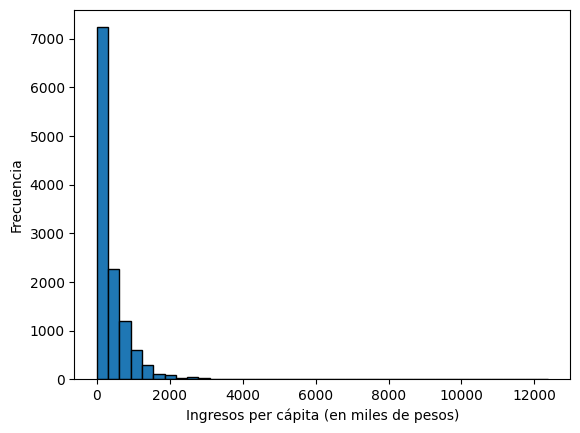

In [ ]:
respuestas = hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]]/1000
plt.hist(respuestas["ingreso"], bins=40, edgecolor='black')
plt.xlabel("Ingresos per cápita (en miles de pesos)")
plt.ylabel("Frecuencia")
plt.show()

### Conclusión del histograma

- La mayoría de las personas tienen ingresos bajos.

- La frecuencia cae rápidamente a medida que el ingreso aumenta.

- Hay pocos casos con ingresos muy altos (algunos > $1.000.000), pero no se ven con tanto detalle porque están lejos del resto.

- Es una distribución típica en este tipo de variables: asimétrica hacia la derecha.

Comentarios de la profe:
Agregar escalas, el eje vertical es frecuencia absoluta
Hace un intervalo final que abarque a valores mayores a 2 millones.
Hacer descripcion de quienes son lo que tienen ingresos
Quitar a los menores del estudio
Ver ingreso per capita del hogar, que es el ingreso total dividido la cant de integrantes


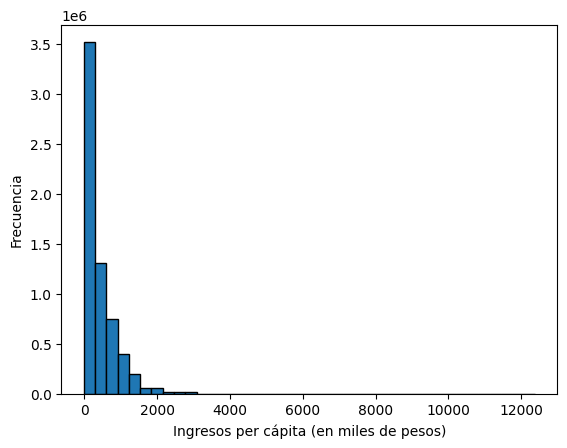

In [ ]:
con_ponderador = hogares_personas[["ingreso", "PONDII"]]
con_ponderador.loc[con_ponderador["ingreso"]>0, "ingreso"] = con_ponderador["ingreso"]/1000
plt.hist(con_ponderador["ingreso"], bins=40, edgecolor='black', weights=con_ponderador["PONDII"])
plt.xlabel("Ingresos per cápita (en miles de pesos)")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
aglomerados = pd.DataFrame([(2, "Gran La Plata"),
               (3, "Bahía Blanca - Cerri"),
               (4, "Gran Rosario"),
               (5, "Gran Santa Fé"),
               (6, "Gran Paraná"),
               (7, "Posadas"),
               (8, "Gran Resistencia"),
               (9, "Comodoro Rivadavia - Rada Tilly"),
               (10, "Gran Mendoza"),
               (12, "Corrientes"),
               (13, "Gran Córdoba"),
               (14, "Concordia"),
               (15, "Formosa"),
               (17, "Neuquén – Plottier"),
               (18, "Santiago del Estero - La Banda"),
               (19, "Jujuy - Palpalá"),
               (20, "Río Gallegos"),
               (22, "Gran Catamarca"),
               (23, "Gran Salta"),
               (25, "La Rioja"),
               (26, "Gran San Luis"),
               (27, "Gran San Juan"),
               (29, "Gran Tucumán - Tafí Viejo"),
               (30, "Santa Rosa – Toay"),
               (31, "Ushuaia - Río Grande"),
               (32, "Ciudad Autónoma de Buenos Aires"),
               (33, "Partidos del GBA"),
               (34, "Mar del Plata"),
               (36, "Río Cuarto"),
               (38, "San Nicolás – Villa Constitución"),
               (91, "Rawson – Trelew"),
               (93, "Viedma – Carmen de Patagones")], columns=["AGLOMERADO", "AGLOMERADO_NOMBRE"])

Se observan los aglomerados presentes en la muestra de la región pampeana.

In [ ]:
hogares_personas[hogares_personas["ingreso"]!=-9].merge(aglomerados, left_on="AGLOMERADO_x", right_on="AGLOMERADO")["AGLOMERADO_NOMBRE"].value_counts().reset_index(name='CANTIDAD_AGLOMERADO')

,AGLOMERADO_NOMBRE,CANTIDAD_AGLOMERADO
0,Gran Córdoba,1888
1,Gran Rosario,1444
2,San Nicolás – Villa Constitución,1241
3,Gran Paraná,1188
4,Concordia,1049
5,Gran La Plata,1038
6,Gran Santa Fé,1026
7,Bahía Blanca - Cerri,803
8,Santa Rosa – Toay,803
9,Río Cuarto,724


[]

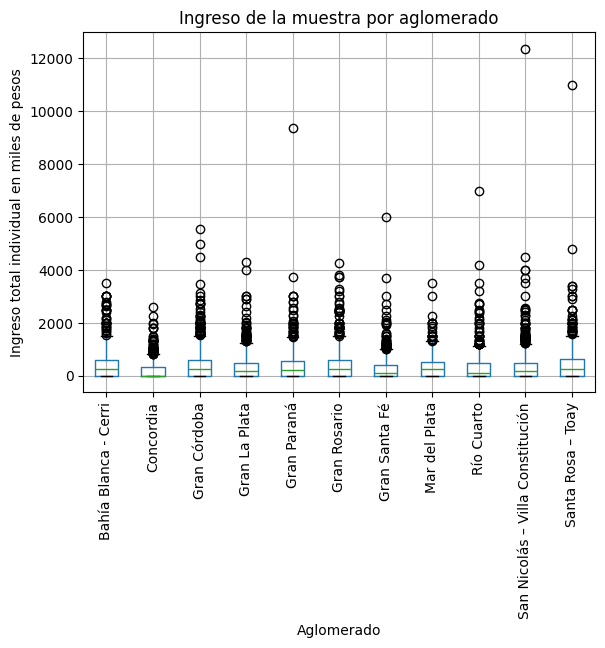

In [ ]:
con_aglomerados = hogares_personas[hogares_personas["ingreso"]!=-9].merge(aglomerados, left_on="AGLOMERADO_x", right_on="AGLOMERADO")
con_aglomerados.loc[con_aglomerados["ingreso"]>0, "ingreso"] = con_aglomerados["ingreso"]/1000
nombres = con_aglomerados["AGLOMERADO_NOMBRE"].unique()
# plotdata = [con_aglomerados[con_aglomerados["AGLOMERADO_NOMBRE"]==nombre] for nombre in nombres if nombre =="Concordia"]
axes = con_aglomerados.boxplot("ingreso", by="AGLOMERADO_NOMBRE")
fig = axes.get_figure()
fig.suptitle('')

plt.xticks(rotation=90)
plt.title("Ingreso de la muestra por aglomerado")
plt.ylabel("Ingreso total individual en miles de pesos")
plt.xlabel("Aglomerado")
plt.plot()




### Ingreso individual por aglomerado urbano

Cada boxplot representa la variabilidad dentro de cada zona, incluyendo la mediana, los cuartiles y los valores atípicos.

Se observa que **la mediana de ingresos es relativamente similar entre los distintos aglomerados**, lo cual indica que, en general, las condiciones económicas son similares en toda la región.

Sin embargo, en todos los aglomerados hay una **gran dispersión** de ingresos y presencia de **valores extremos altos**, lo que es consistente con la asimetría observada previamente en la variable ingreso.

Este análisis permite ver que **no hay un único aglomerado con ingresos claramente más altos o bajos**, aunque algunos como *Santa Rosa - Toay* y *Gran Rosario* presentan más casos con ingresos extremos elevados.




### Análisis de Variables de Crédito

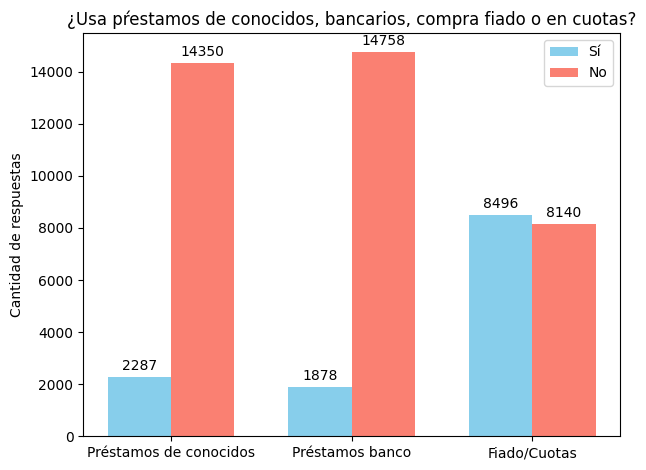

In [ ]:

conteo_personales = hogares['prestamo_personas'].value_counts().sort_index()
conteo_banco = hogares['prestamo_banco'].value_counts().sort_index()
conteo_fiado = hogares['compra_cuotas'].value_counts().sort_index()

conteo_personales = conteo_personales.reindex([1, 2], fill_value=0)
conteo_banco = conteo_banco.reindex([1, 2], fill_value=0)
conteo_fiado = conteo_fiado.reindex([1, 2], fill_value=0)

categorias = ['Préstamos de conocidos', 'Préstamos banco', 'Fiado/Cuotas']
si = [conteo_personales[1], conteo_banco[1], conteo_fiado[1]]
no = [conteo_personales[2], conteo_banco[2], conteo_fiado[2]]

x = np.arange(len(categorias))
ancho = 0.35

fig, ax = plt.subplots()
barras_si = ax.bar(x - ancho/2, si, width=ancho, label='Sí', color='skyblue')
barras_no = ax.bar(x + ancho/2, no, width=ancho, label='No', color='salmon')

ax.set_ylabel('Cantidad de respuestas')
ax.set_title('¿Usa pŕestamos de conocidos, bancarios, compra fiado o en cuotas?')
ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.legend()

for barra in barras_si + barras_no:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()

### Conclusiones del gráfico

- **Préstamos de conocidos :** Solo el 13.7% de los hogares declaró usar este tipo de crédito informal.

- **Préstamos bancarios:** Apenas el 11.3% de los hogares accede al crédito formal bancario. La gran mayoría no lo utiliza.

- **Compras fiadas o en cuotas:** Esta práctica está más extendida: el 51% de los hogares respondió que sí lo hace..

Esto indica que:

- El acceso al crédito bancario es **muy bajo** en la muestra.

- Los préstamos informales con personas también son poco frecuentes.

- La forma más común de financiamiento es la compra **fiada o en cuotas**, que probablemente incluye tarjetas de crédito o creditos informales.

La práctica más común es comprar fiado o en cuotas, lo que puede incluir desde pedir fiado en un comercio local hasta pagar en cuotas con tarjeta de crédito u otros mecanismos de financiación.

Estas diferencias pueden estar relacionadas con el nivel de ingresos, el nivel educativo o la informalidad del trabajo, y podrían explorarse más adelante.

Comentario de la profe:

Cruzar con cuantos tienen ingresos y cuantos no.

